In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import random

# Vibrations in quasicrystals

## Background
Quasicrystals are a solid material that lack periodicty, but are still exoerience symmetry. It might be best to thin of it as having areas of symmetry. As you expand fruther out, the area that you are viewing because less and less symmetrical to the point that there no longer is any symmetry whatsoever.

The goal of this project is to model the phonon inducing vibrations within a quasicrystal, as the lack of periodicity makes it much more difficult compared to a regular crystal. This is because the links or 'springs' between the atoms are not all identical.

## Building the Quasicrystal
The quasicrystal is to be built by generating a points of symmetry.

Two functions were created one to create the quasicrystal at that specific phase, and the other to geneates a list of the images of the crystal at the different phases so the movement could be modeled.

In [ ]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import time

def pattern(pw, stripes, N, phase):
    crystal = np.empty((N, N))                    # Generates an empty nxn array to make a square image
    l = np.arange(-N/2, N/2, dtype = np.float64)  # Creates an array within the bounds of the image
    
    xv , yv = np.meshgrid(l, l)                   # geneartes an x and y grid that's lxl
    theta = np.arctan2(yv, xv)                    # finds the angle between the two girds
    r = np.log(np.hypot(xv, yv))                  # finds the natural log of the magnitude between the two grids
    r[np.isinf(r) == True] = 0                    # if the magnitude is too large that specific one is equal to zerio
    
    tcos = theta * np.cos(np.arange(0, pi, pi/pw))[:, np.newaxis, np.newaxis] # geneates the shift of each point
    rsin = r * np.sin(np.arange(0, pi, pi/pw))[:, np.newaxis, np.newaxis]
    inner = (tcos - rsin) * stripes
    
    cinner = np.cos(inner)
    sinner = np.sin(inner)
    
    crystal[:] = np.sum(cinner * np.cos(phase) - sinner * np.sin(phase), axis=0) + pw # is the summation of the arrays, generates an RGB value at each point
    return crystal
    


def generateMomentsInCrystal(fig, phases, pw, stripes, N):
    images = []
    for phase in phases:      
        images.append(pattern(pw, stripes, N, phase))    # creates a list of images each at a different phase in order to show the tranisitons
    return np.array(images)



fig = plt.figure()
plt.xticks([])
plt.yticks([])

pw       = 11    # number of plane waves, should be an odd number
stripes = 25 # number of stripes per wave
N       = 512  # image size
ite     = 10   # number of phase shifts
phases  = np.arange(0, 2*pi, 2*pi/ite)





images = generateMomentsInCrystal(fig, phases, pw, stripes, N)

for i in range(0, len(images)):                     # plots the crystal
    time.sleep(0.5)    
    plt.imshow(images[i], cmap="RdGy")
    

## Applying the Equation of motion
The equation of motion used will be

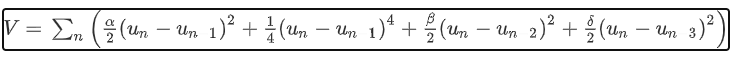